## CS5901 Programming in Python: Assignment 2

Name: **Julia Molnar**
<br>
Student ID number: **23003501**

This notebook is a demonstration of the code for Assignment 2 of CS5901 Programming in Python. 


In [1]:
import cs5901assignment2 as mod

#### Stage 1. Data cleaning and profiling

##### Task 1: Import the data as a pandas dataframe

In [2]:
data = mod.import_data('P2data5012.csv')

After importing the data, a quick review has been performed to understand its characteristics and any potential issue that needs to be handed during the exercise.

##### Task 2: Identify and remove any data rows that make no sense

In [3]:
data.info()
print(data.head(50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Level       482 non-null    int64  
 1   T4          473 non-null    float64
 2   T3          375 non-null    float64
 3   T3adjusted  477 non-null    float64
 4   T4adjusted  374 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.0 KB
    Level    T4    T3  T3adjusted  T4adjusted
0       5   8.1   2.1    2.008299    1.280579
1       5   8.7   NaN    2.056710         NaN
2      10   3.5   1.6    1.518294    1.169607
3      20   7.9   4.6    1.991632    1.663103
4      30   2.3   0.4    1.320006    0.736806
5      20   5.4   2.6    1.754411    1.375069
6       5   1.8   NaN    1.216440         NaN
7       5  10.5   NaN    2.189760         NaN
8       5   9.1   3.6    2.087759    1.532619
9       5  13.5   NaN    2.381102         NaN
10      5   8.1   NaN    2.008299         NaN
11    

Main observations: 
- Level column contains integers, while T3, T4, T3adjusted and T4adjusted columns contain float values
- T3adjusted and T4adjusted seem to be some kind of transformation (potentially normalization or scaling) of T3 and T4 columns respectively

Issued to address: 
1. Column headers seems to be switched based on the number of values in column T3, T4, T3adjusted, T4adjusted  
2. There are missing values in T3, T4, T3adjusted and T4adjusted columns
3. While in some cases values are defined in T3 and T4 column, their adjusted value is missing from T3adjusted and T4adjused column respectively. Also, in some cases there is value in the adjusted column while its original value is missing (e.g., see row 47)

The above issues are addressed as following:
1. `data_column_rename` function to fix column header issue
2. To be addressed in next task after cleaning the data
3. `data_missmatch` function to remove data rows with mismatch between original (T3 and T4) and adjusted (T3adjusted and T4adjusted) columns, i.e. when value is missing from original column but not missing from the adjusted column or vice versa
 

In [4]:
data_newcolname = mod.data_column_rename(data)
print(data_newcolname)

     Level    T3    T4  T3adjusted  T4adjusted
0        5   8.1   2.1    2.008299    1.280579
1        5   8.7   NaN    2.056710         NaN
2       10   3.5   1.6    1.518294    1.169607
3       20   7.9   4.6    1.991632    1.663103
4       30   2.3   0.4    1.320006    0.736806
..     ...   ...   ...         ...         ...
477    150 -13.6  -4.5   -2.386966   -1.650964
478     60  17.2  29.2    2.581326    3.079363
479    400   2.7  14.7    1.392477    2.449660
480    150  29.4  27.6    3.086378    3.022060
481    200   6.5   3.8    1.866256    1.560491

[482 rows x 5 columns]


In [5]:
data_filtered = mod.data_missmatch(data_newcolname)
print(data_filtered)

     Level    T3    T4  T3adjusted  T4adjusted
0        5   8.1   2.1    2.008299    1.280579
1        5   8.7   NaN    2.056710         NaN
2       10   3.5   1.6    1.518294    1.169607
3       20   7.9   4.6    1.991632    1.663103
4       30   2.3   0.4    1.320006    0.736806
..     ...   ...   ...         ...         ...
477    150 -13.6  -4.5   -2.386966   -1.650964
478     60  17.2  29.2    2.581326    3.079363
479    400   2.7  14.7    1.392477    2.449660
480    150  29.4  27.6    3.086378    3.022060
481    200   6.5   3.8    1.866256    1.560491

[477 rows x 5 columns]


In [6]:
missing_values = data_filtered.isnull().sum()
print(missing_values)

Level           0
T3              5
T4            107
T3adjusted      5
T4adjusted    107
dtype: int64


##### Task 3: Replace any missing values in T3 and T4 with average values for their specific level

`replace_with_average` function to replace any missing values in T3 and T4 with average values for their specific level. 

In [7]:
data_cleaned = mod.replace_with_average(data_filtered)
print(data_cleaned)
missing_values_cleaned = data_cleaned.isnull().sum()
print(missing_values_cleaned)

     Level    T3         T4  T3adjusted  T4adjusted
0        5   8.1   2.100000    2.008299    1.280579
1        5   8.7   3.162111    2.056710         NaN
2       10   3.5   1.600000    1.518294    1.169607
3       20   7.9   4.600000    1.991632    1.663103
4       30   2.3   0.400000    1.320006    0.736806
..     ...   ...        ...         ...         ...
477    150 -13.6  -4.500000   -2.386966   -1.650964
478     60  17.2  29.200000    2.581326    3.079363
479    400   2.7  14.700000    1.392477    2.449660
480    150  29.4  27.600000    3.086378    3.022060
481    200   6.5   3.800000    1.866256    1.560491

[477 rows x 5 columns]
Level           0
T3              0
T4              0
T3adjusted      5
T4adjusted    107
dtype: int64


While the above code can replace missing values in T3 and T4 column, the code cannot be applied to calculate missing T3adjusted and T4adjusted values, as these are transformation of T3 and T4 values respectively. Linear regression can be applied to calculate the missing values. `predict_missingvalues` performs this calculation. 

In [8]:
data_cleaned_adj = mod.predict_missingvalues(data_cleaned)
print(data_cleaned_adj)
missing_values_cleaned_adj = data_cleaned_adj.isnull().sum()
print(missing_values_cleaned_adj)

     Level    T3         T4  T3adjusted  T4adjusted
0        5   8.1   2.100000    2.008299    1.280579
1        5   8.7   3.162111    2.056710    1.271388
2       10   3.5   1.600000    1.518294    1.169607
3       20   7.9   4.600000    1.991632    1.663103
4       30   2.3   0.400000    1.320006    0.736806
..     ...   ...        ...         ...         ...
477    150 -13.6  -4.500000   -2.386966   -1.650964
478     60  17.2  29.200000    2.581326    3.079363
479    400   2.7  14.700000    1.392477    2.449660
480    150  29.4  27.600000    3.086378    3.022060
481    200   6.5   3.800000    1.866256    1.560491

[477 rows x 5 columns]
Level         0
T3            0
T4            0
T3adjusted    0
T4adjusted    0
dtype: int64


##### Task 4: Write code that presents a table of descriptive statistics and compare it with pandas.describe()

`descriptive_statistics` function calculates descriptive statistics for each column including count, mean, standard deviation, min and max. At the end, result is compared with `pandas.describe()`

In [9]:
descriptive_statistics_calculated = mod.descriptive_statistics(data_cleaned_adj)
print(descriptive_statistics_calculated)

            Level          T3          T4  T3adjusted  T4adjusted
count  477.000000  477.000000  477.000000  477.000000  477.000000
mean    35.513627   15.416242   12.387788    2.036318    1.823615
std     65.760726   20.007141   15.013981    1.265439    1.126366
min      5.000000  -44.400000  -38.400000   -3.541014   -3.373731
max    400.000000  235.200000  148.400000    6.172756    5.294334


In [10]:
data_cleaned_adj.describe()

,Level,T3,T4,T3adjusted,T4adjusted
count,477.000000,477.000000,477.000000,477.000000,477.000000
mean,35.513627,15.416242,12.387788,2.036318,1.823615
std,65.760726,20.007141,15.013981,1.265439,1.126366
min,5.000000,-44.400000,-38.400000,-3.541014,-3.373731
25%,10.000000,4.342029,3.162111,1.631414,1.386350
50%,20.000000,10.900000,7.900000,2.204352,1.894536
75%,30.000000,19.800000,16.463368,2.705339,2.438499
max,400.000000,235.200000,148.400000,6.172756,5.294334


##### Task 5: Write code that identifies any repeated rows or confirms that there are none

The code `duplicate_check` check if any row is repeated in the dataframe and lists all the repeated rows.  

In [11]:
mod.duplicate_check(data_cleaned_adj)

Repeated rows found:
     Level         T3         T4  T3adjusted  T4adjusted
125     20  14.700000  16.463368    2.449660    2.067569
216     40  18.978535  19.349276    2.204352    2.240312
267      5  18.400000  12.100000    2.640012    2.295770
294     10  19.800000  11.400000    2.705339    2.250617
344     15  31.000000  14.531055    3.141381    1.951905
362     20   4.000000   4.500000    1.587401    1.650964
466    200  12.000000  15.785714    2.289428    2.027006
467    200  16.300000  37.300000    2.535494    3.341204
468    100  27.800000  42.300000    3.029342    3.484283
469    200  12.900000   9.000000    2.345290    2.080084
470    100  19.100000  17.800000    2.673075    2.610999
471    100  18.700000   9.100000    2.654283    2.087759
472    300   0.000000   0.000000    0.000000    0.000000
473    400  14.900000  12.900000    2.460719    2.345290
474    400   0.600000   1.800000    0.843433    1.216440
475    300   6.900000   8.000000    1.903778    2.000000
479    400

#### Stage 2. Time and space complexity

##### Task 1: Time and space needed for standard matrix multiplication

`MatrixMult` class is the adaptations of the code provided in the description of the assignment to investigate the time and space need for standard matrix multiplication. It contains two functions: 
- `matrix_mult` that multiplies two randomly generated matrices using numpy's matmul 
- `timespace_test` to calculate and plot the time and space requirement for the operation. 

<br>Note: to visualize the result, I have used `matpotlib` for all tasks in Stage 2.  

Calculation time: [0.00162673 0.00998664 0.02943611 0.08189702 0.17873383 0.32988882
 0.52612114 0.92019844 0.89198971 1.07900786]
Calculation space: [       0.        0.        0.        0.        0.  6598656.  9572352.
 13287424. -1806336. -1806336.]


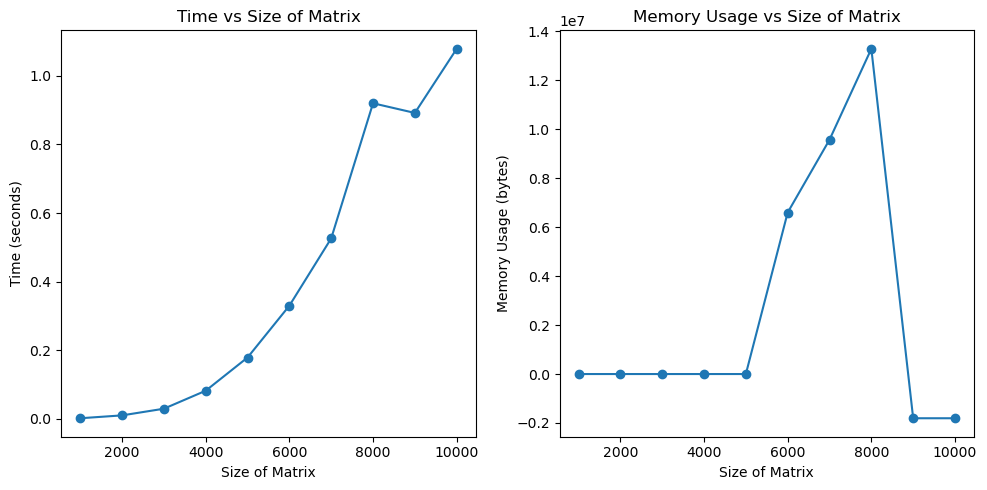

In [15]:
matrix_multiplicator = mod.MatrixMult()
matrix_multiplicator.timespace_test()

##### Task 2: Time and space needed for loop based sorting

`LoopSorting` class is the adaptations of the code provided in the description of the assignment to investigate the time and space need for loop based sorting (i.e., sorting an unordered list of integers inefficiently by searching for the smallest element, then
the next smallest). It contansn two functions
- `list_sort`: creates a list of random integers between 0 and 50000 as an input and performs a bubble sort algorithm to sort the elements in ascending order
- `timespace_test`: calculaese and plot the time and space requirement fo rsorting lists of increasing sizes  

Calculation time: [0.01969004 0.01812553 0.00015879 0.00536942 0.01006317 0.01284003
 0.00762105 0.0066433  0.01175332 0.02030635]
Calculation space: [196608. 196608. 196608. 196608. 196608. 196608. 196608. 196608. 196608.
 196608.]


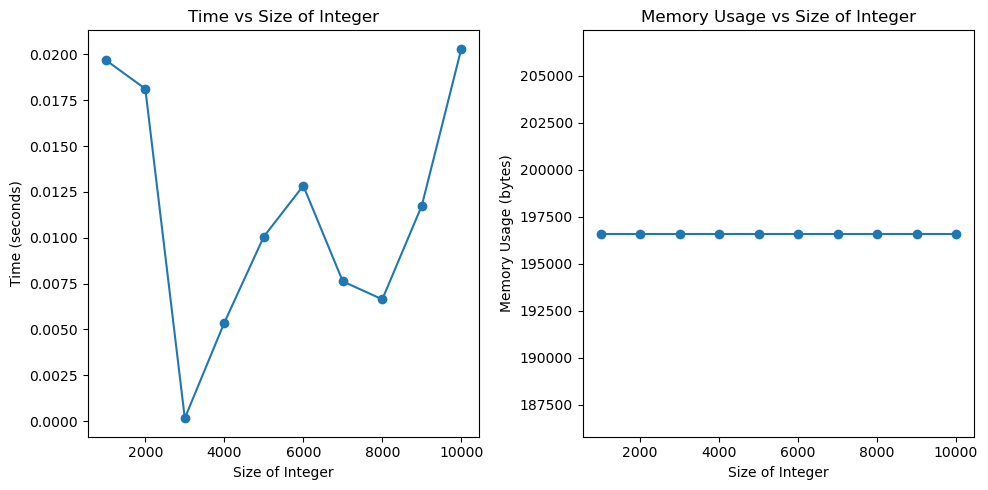

In [13]:
loop_sorter = mod.LoopSorting()
loop_sorter.timespace_test()

##### Task 3: Time and space needed for finding a substring in a string

`SubstringFinder` class is the adaptations of the code provided in the description of the assignment to investigate the time and space need of Python's find() method and the loop‑based implementation of a method that 
checks if one string is a substring of another. It contains three functions:
- `find_method`: it takes two strings (*test_str* and *test_substr*) as input and uses the string.find() method to find the index of the first occurrence of *test_substr*. It returns the index where the substring is found, or -1 if the substring is not found.
- `loop_method`:  it takes two strings (*test_str* and *test_substr*) as input and iterates through *test_str* using a loop, comparing substrings of length equal to *test_substr*. If it finds a match, it returns the index where the substring is found. If no match is found, it returns -1.
- `timespace_test`: calculates and plots the time and space requirement for bothe operation It generates random strings of varying lengths and substrings, then measures the time taken to find the substring and the memory usage. 

Calculation time (find method): [0.00010395 0.00019383 0.00024366 0.00052953 0.00048232 0.00050664
 0.00055504 0.00071669 0.00093794 0.00082183]
Calculation space (find method): [     0.      0.      0.      0. 233472. 233472. 303104. 303104. 466944.
 466944.]
Calculation time (loop method): [ 0.08180523  0.31177735  0.74474597  1.87672639  3.23325682  4.6527245
  6.31249928  8.26127744 10.42931318 12.85318065]
Calculation space (loop method): [     0.      0.      0. 233472. 233472. 303104. 303104. 466944. 466944.
 466944.]


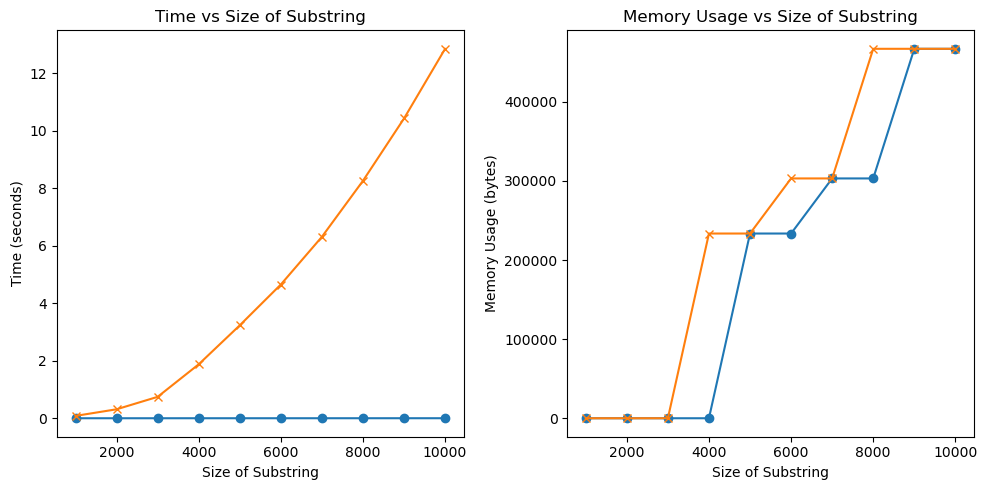

In [14]:
substring_finder = mod.SubstringFinder()
substring_finder.timespace_test()